In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### EDA & Basice Preprocessing (No need do train test split first)
- Categorical,numerical features
- missing/NaN values
- irrelevant columns based on common sense

In [2]:
df = pd.read_csv('titanic.csv')
df = df.drop(columns=['PassengerId','Name','Ticket'])
print(df.shape)
df.head()


(418, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [3]:
df.info()
# Categorical - Survived (y), Pclass, SibSp, Parch (already in numerical)
#             - *Sex ,*Embarked (OHE)
# Numerical - Age, Ticket

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [4]:
#sex
print(len(df[(df['Sex']=='female') & (df['Survived']==1)])) # all female survived
print(len(df[(df['Sex']=='male') & (df['Survived']==0)])) # all male death
df['Sex'].value_counts()

152
266


Sex
male      266
female    152
Name: count, dtype: int64

In [5]:
#embarked
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [6]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder

def ohe_sex(df,col):
    
    ohe_sex = OneHotEncoder(drop='first')
    result = ohe_sex.fit_transform(df[[col]]).toarray()
    
    return result

def ohe_embarked(df,col):
    
    ohe_embarked = OneHotEncoder(drop='first')
    result = ohe_embarked.fit_transform(df[[col]]).toarray()
    result = pd.DataFrame(result, columns=df[col].unique()[0:2])
    df = pd.concat([df, result], axis=1)
    df.drop(columns=['Embarked'],inplace=True)

    return df

# Transform the 'Sex' column using the OneHotEncoder

 # 1 = male, 0 = female
df['Sex'] = ohe_sex(df,'Sex')

# [Q,S] => [0,0] => C
df = ohe_embarked(df,'Embarked')

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,0,3,1.0,34.5,0,0,7.8292,NaN,1.0,0.0
1,1,3,0.0,47.0,1,0,7.0000,NaN,0.0,1.0
2,0,2,1.0,62.0,0,0,9.6875,NaN,1.0,0.0
3,0,3,1.0,27.0,0,0,8.6625,NaN,0.0,1.0
4,1,3,0.0,22.0,1,1,12.2875,NaN,0.0,1.0


In [8]:
#len(df['Cabin'].isnull()) / df.shape[0] 
missing = len(df[df['Cabin'].isnull()]) / df.shape[0] *100
print('Missing Rate on Cabin: {: .2f} %'.format(missing))

missing_survived = len(df[(df['Cabin'].isnull()) & (df['Survived']==1)]) / df.shape[0] *100
print(f'Survive but missing: {missing_survived:.2f} %')
missing_die = len(df[(df['Cabin'].isnull()) & (df['Survived']==0)]) / df.shape[0] *100
print(f'Death and missing: {missing_die:.2f} %')

df[(~df['Cabin'].isnull())]['Cabin'].unique()

Missing Rate on Cabin:  78.23 %
Survive but missing: 25.84 %
Death and missing: 52.39 %


array(['B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34', 'D19',
       'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53', 'D43',
       'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

In [9]:

df['Cabin'] = df[~df['Cabin'].isnull()]['Cabin'].str[0]

df['Cabin'] = df['Cabin'].fillna('Missing')
print(df['Cabin'].isnull().sum())
df['Cabin'].unique()
# Fill missing values in the 'Cabin' column with 'Missing'

0


array(['Missing', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [10]:
df['Cabin'].value_counts().values

array([327,  35,  18,  13,   9,   8,   7,   1], dtype=int64)

In [11]:
# As Cabin has very high missing rate on the dataset, considered that it is also important in predicting the survival rate.
# it will not be removed first, ordinal encoding will be performed for non-na row,
# besides, a binary row will be create to the df for indicating there are missing value on that column of that row.
cabin_mapping = {'Missing':0,
                 'A': 1, 'B': 2, 'C': 3,
                 'D': 4, 'E': 5, 'F': 6, 
                 'G': 7}

df['Cabin'] = df['Cabin'].map(cabin_mapping)
df['Miss_cabin'] = np.where(df['Cabin']==0, 1,0)


In [12]:
#df[df['Miss_cabin']==1]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S,Miss_cabin
0,0,3,1.0,34.5,0,0,7.8292,0,1.0,0.0,1
1,1,3,0.0,47.0,1,0,7.0000,0,0.0,1.0,1
2,0,2,1.0,62.0,0,0,9.6875,0,1.0,0.0,1
3,0,3,1.0,27.0,0,0,8.6625,0,0.0,1.0,1
4,1,3,0.0,22.0,1,1,12.2875,0,0.0,1.0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    float64
 3   Age         332 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        417 non-null    float64
 7   Cabin       418 non-null    int64  
 8   Q           418 non-null    float64
 9   S           418 non-null    float64
 10  Miss_cabin  418 non-null    int32  
dtypes: float64(5), int32(1), int64(5)
memory usage: 34.4 KB


#note 
- mean imputation => normal distribution nature
- median imputation => skewed distribution

In [14]:
df[df['Fare'] == 0] # reasonable, maybe that guy is vip
# 1 row of Fare is NaN
df[df['Fare'].isnull()].index # remove this row or impute with median
df = df.drop(index = df[df['Fare'].isnull()].index)

In [15]:
df[df['Age'].isnull()].shape # for age, many rows is NaN, hence impute with mean is better
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Q', 'S', 'Miss_cabin'],
      dtype='object')

In [17]:
def check_outlier(df,col):
    #Z = (point - mean of column)/std of that column
    Z = (df[col] - np.mean(df[col])) / np.std(df[col])
    outliers = df[np.abs(Z) > 3]
    
    return outliers

result = check_outlier(df,'Fare')
print(result)

## note that very high age or fare does not mean it is outlier, 
## as ppl have diff age, and they might bought the ticket at diff price level

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Cabin    Q    S  \
24          1       1  0.0  48.0      1      3  262.3750      2  0.0  0.0   
53          1       1  0.0  28.0      3      2  263.0000      3  0.0  1.0   
59          1       1  0.0  36.0      0      0  262.3750      2  0.0  0.0   
64          0       1  1.0  13.0      2      2  262.3750      2  0.0  0.0   
69          1       1  0.0  60.0      1      4  263.0000      3  0.0  1.0   
74          1       1  0.0  35.0      0      0  211.5000      3  0.0  0.0   
75          0       1  1.0  32.5      0      0  211.5000      3  0.0  0.0   
81          0       1  1.0  67.0      1      0  221.7792      3  0.0  1.0   
114         1       1  0.0  63.0      1      0  221.7792      3  0.0  1.0   
142         0       1  1.0  61.0      1      3  262.3750      2  0.0  0.0   
156         1       1  0.0  29.0      0      0  221.7792      3  0.0  1.0   
184         1       1  0.0  27.0      1      1  247.5208      2  0.0  0.0   

# Normalization & Transformation
- in this part, firstly the conitnuous variable will be standardized.
- later, the distribution will be observed and convert to normal distribution
    - findings: 1. for Age : transformed using box-cox/yeo-johnson is better than before
                2. for Fare : box_cox / log transform is better as compared to other (althought still look abit bad)

# Note: before that, lets do train_test_split first

In [18]:
X = df.drop(columns=['Survived'])
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=43,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(333, 10)
(84, 10)
(333,)
(84,)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler_Age = MinMaxScaler()
scaler_Fare = MinMaxScaler()

def Standard_Age(X,col):
    X[col] = scaler_Age.fit_transform(X[[col]])
    return X[col]

def Standard_Fare(X,col):
    
    X[col] = scaler_Fare.fit_transform(X[[col]])
    return X[col]

X_train['Age'] = Standard_Age(X_train,'Age')
X_train['Fare'] = Standard_Fare(X_train,'Fare')

X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S,Miss_cabin
257,3,1.0,0.367005,0,0,0.015713,0,0.0,1.0,1
1,3,0.0,0.617566,1,0,0.013663,0,0.0,1.0,1
341,3,1.0,0.419755,0,0,0.014794,0,0.0,1.0,1
160,3,0.0,0.395770,0,0,0.015094,0,1.0,0.0,1
172,3,1.0,0.301068,1,0,0.027131,0,0.0,1.0,1


Original Distribution:


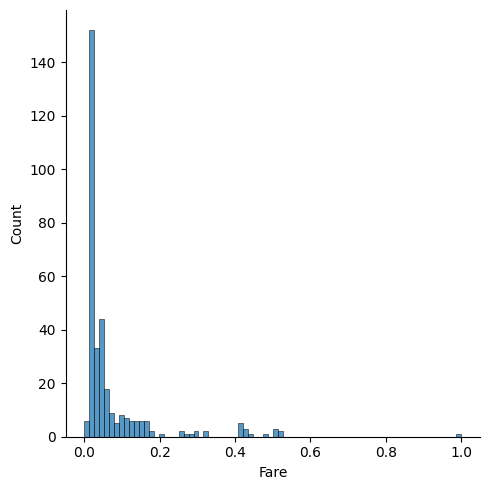

In [20]:
# right skew distribution - perform data transformation
import scipy.stats as stat
import pylab
from sklearn.preprocessing import PowerTransformer
from qqplot import plot_data
print('Original Distribution:')
sns.displot(X_train['Fare'])
plt.show()

def transformer(df,col,method):
    if method == 'box-cox':
        bc = PowerTransformer(method=method)
        bc_data = bc.fit_transform(df[[col]]+0.0001)
        df[f'new_bc_{col}'] = bc_data

        return bc
    
    yj = PowerTransformer(method=method)
    yj_data = yj.fit_transform(df[[col]])
    df[f'new_yj_{col}'] = yj_data

    return yj

bc_fare = transformer(X_train,'Fare','box-cox')
yj_fare = transformer(X_train,'Fare','yeo-johnson')

bc_age = transformer(X_train,'Age','box-cox')
yj_age = transformer(X_train,'Age','yeo-johnson')

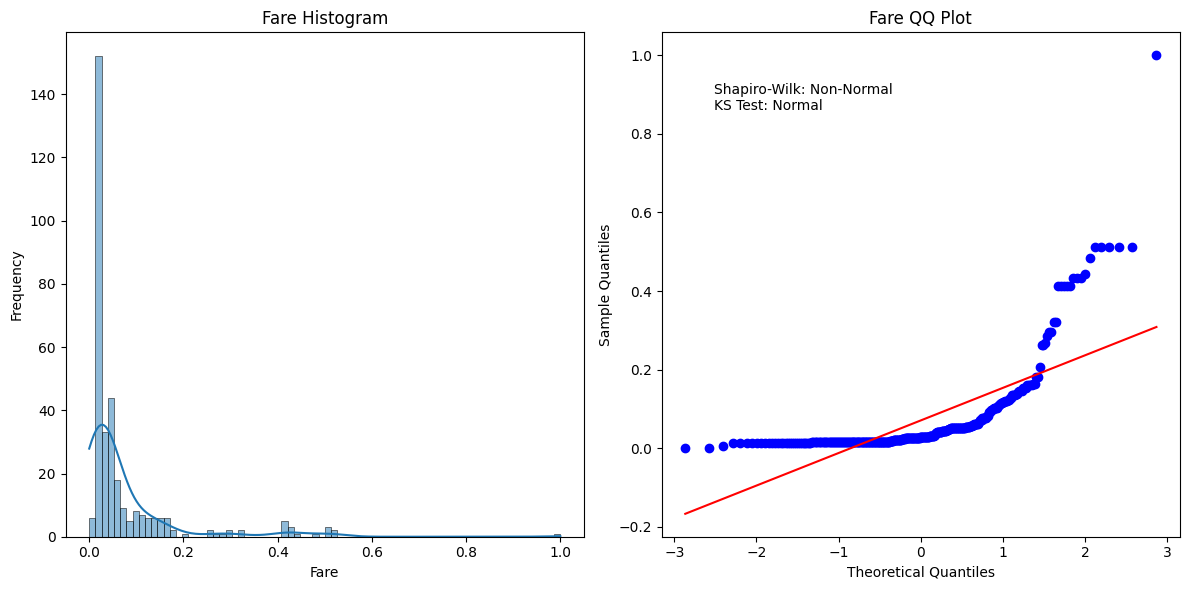

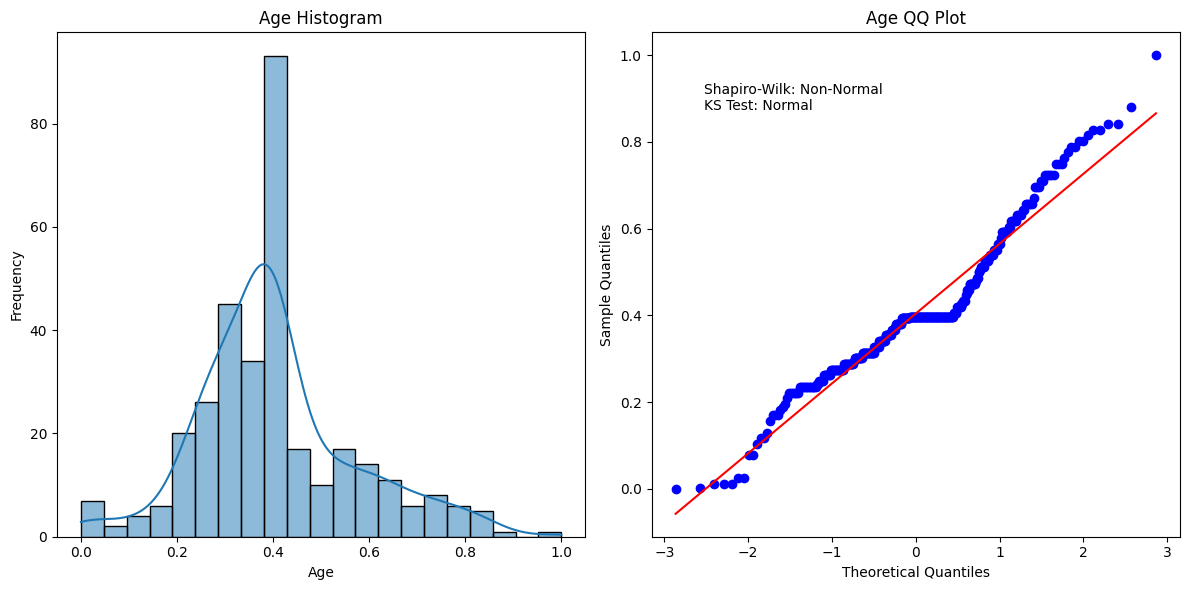

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S,Miss_cabin,new_bc_Fare,new_yj_Fare,new_bc_Age,new_yj_Age
257,3,1.0,0.367005,0,0,0.015713,0,0.0,1.0,1,-0.769710,-0.873461,-0.171383,-0.155448
1,3,0.0,0.617566,1,0,0.013663,0,0.0,1.0,1,-0.894863,-0.965049,1.263416,1.273677
341,3,1.0,0.419755,0,0,0.014794,0,0.0,1.0,1,-0.823719,-0.914160,0.146601,0.173221
160,3,0.0,0.395770,0,0,0.015094,0,1.0,0.0,1,-0.805688,-0.900774,0.003301,0.025845
172,3,1.0,0.301068,1,0,0.027131,0,0.0,1.0,1,-0.277307,-0.413969,-0.585077,-0.591012


In [21]:
plot_data(X_train,'Fare')
plot_data(X_train,'Age')
X_train.head()

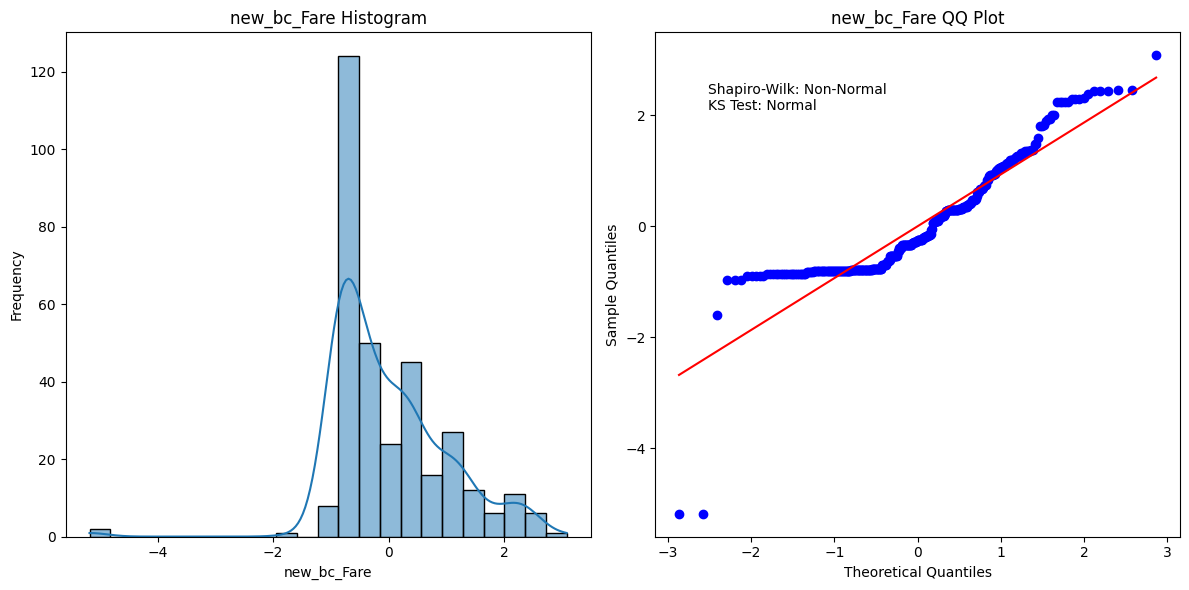

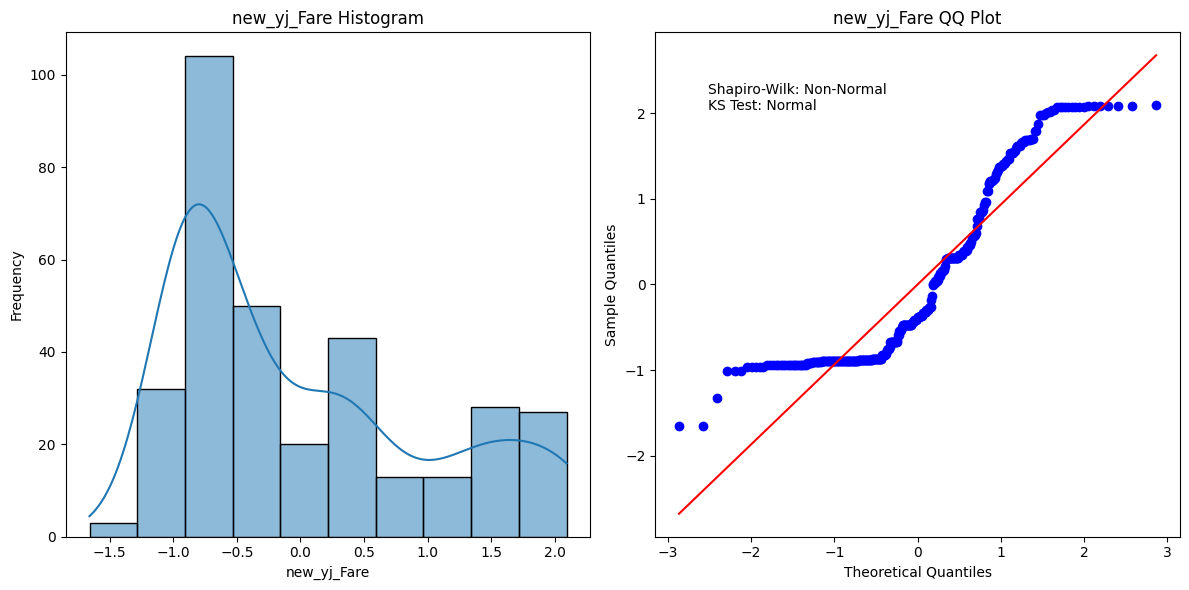

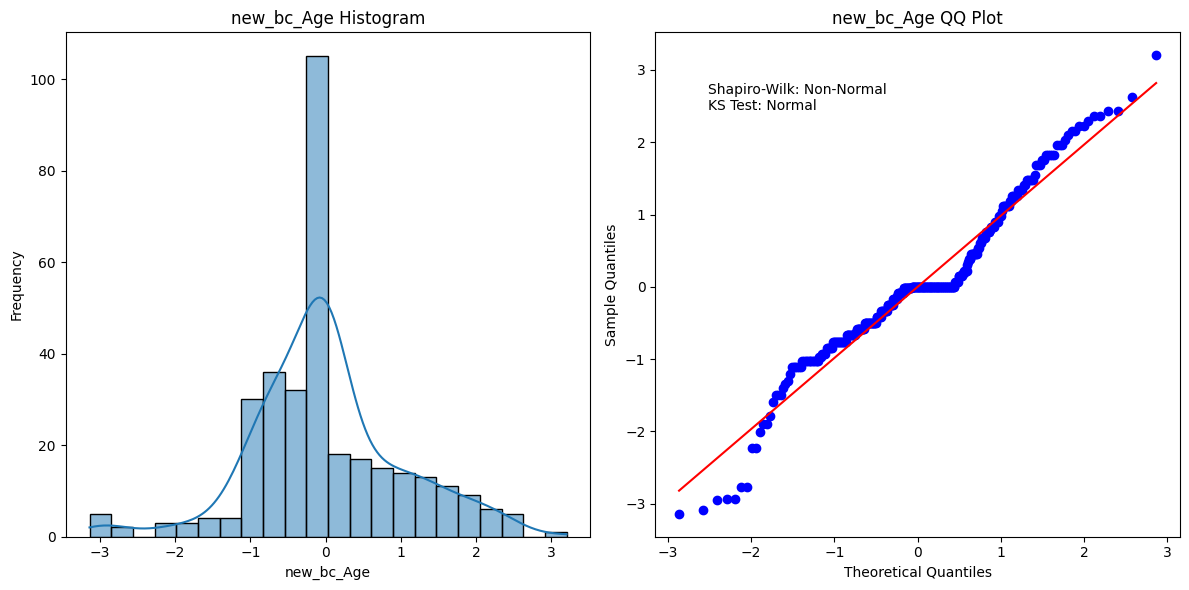

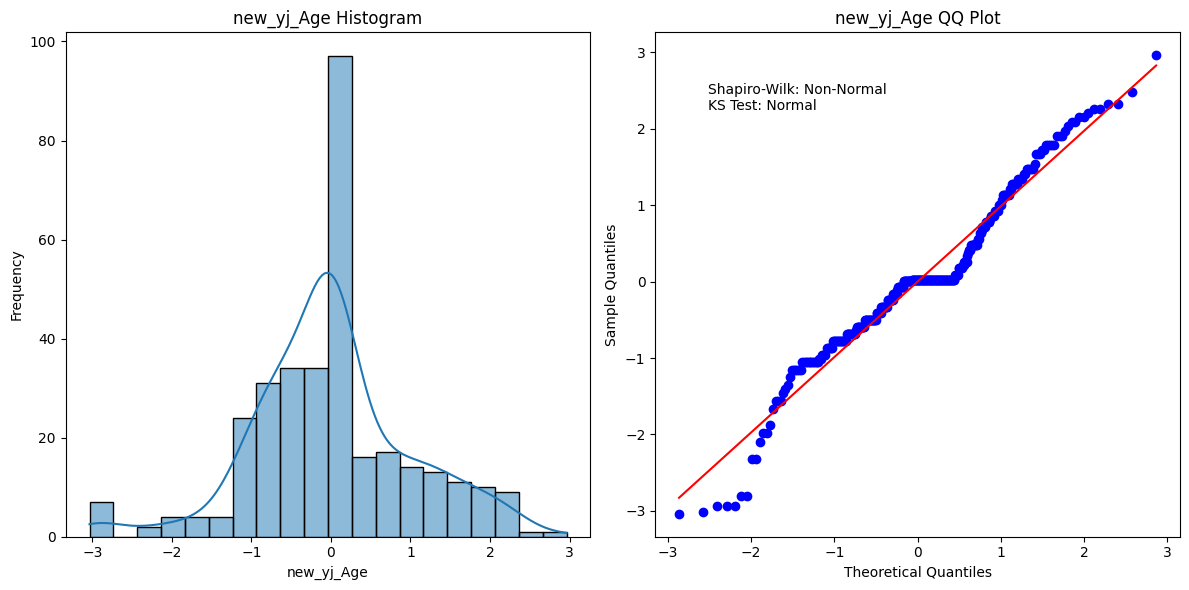

In [22]:
plot_data(X_train,'new_bc_Fare') # both look abit sucks
plot_data(X_train,'new_yj_Fare')
plot_data(X_train,'new_bc_Age') # both look good
plot_data(X_train,'new_yj_Age') 


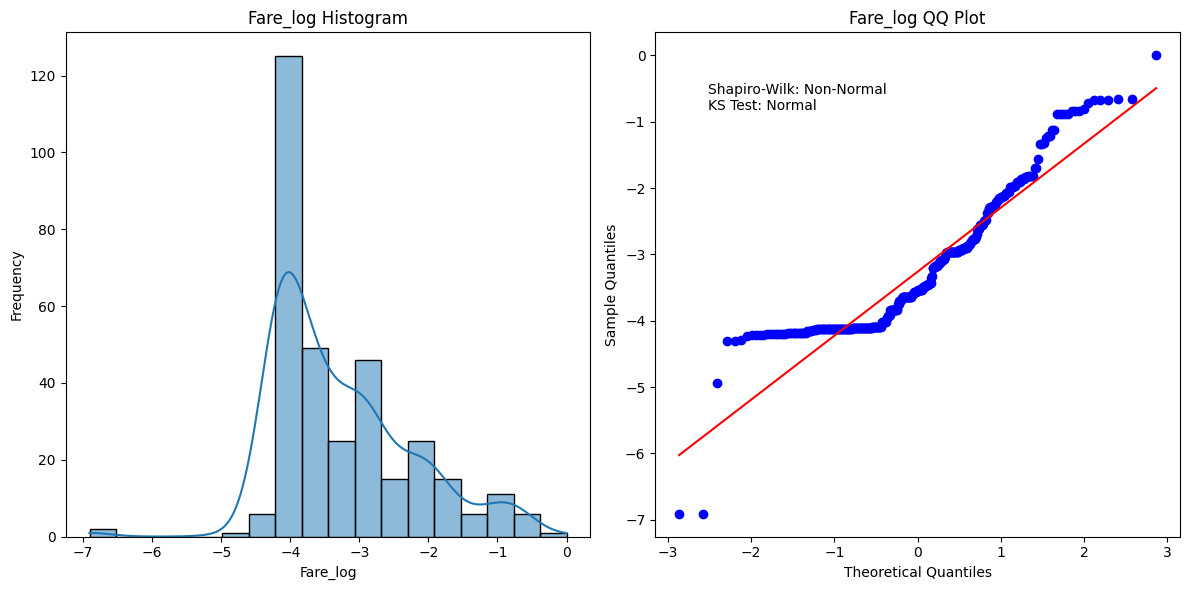

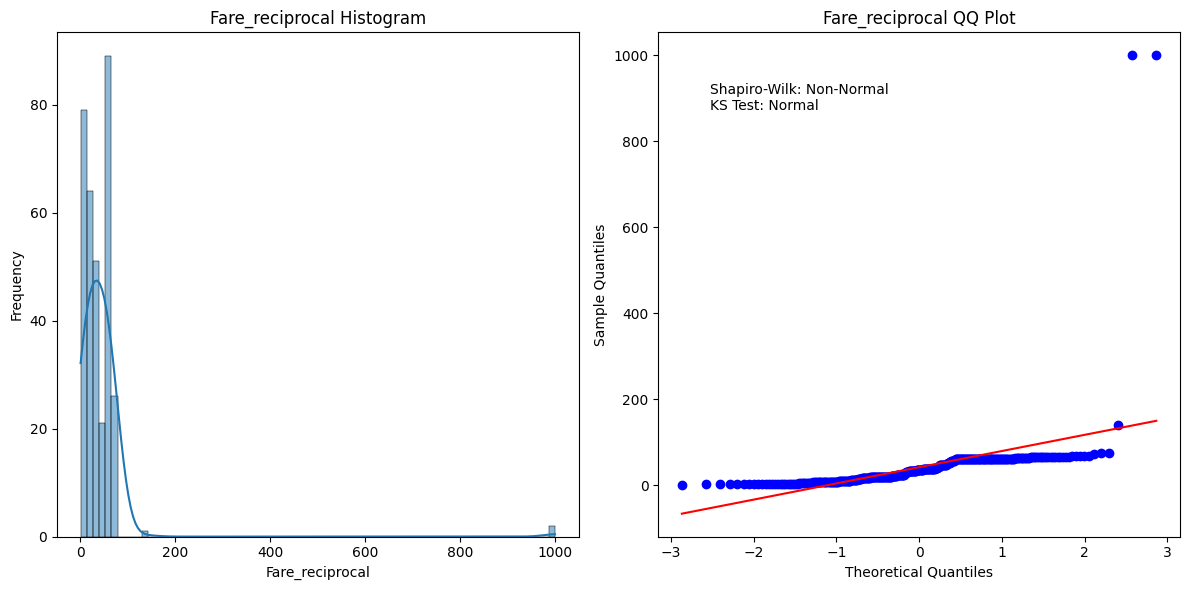

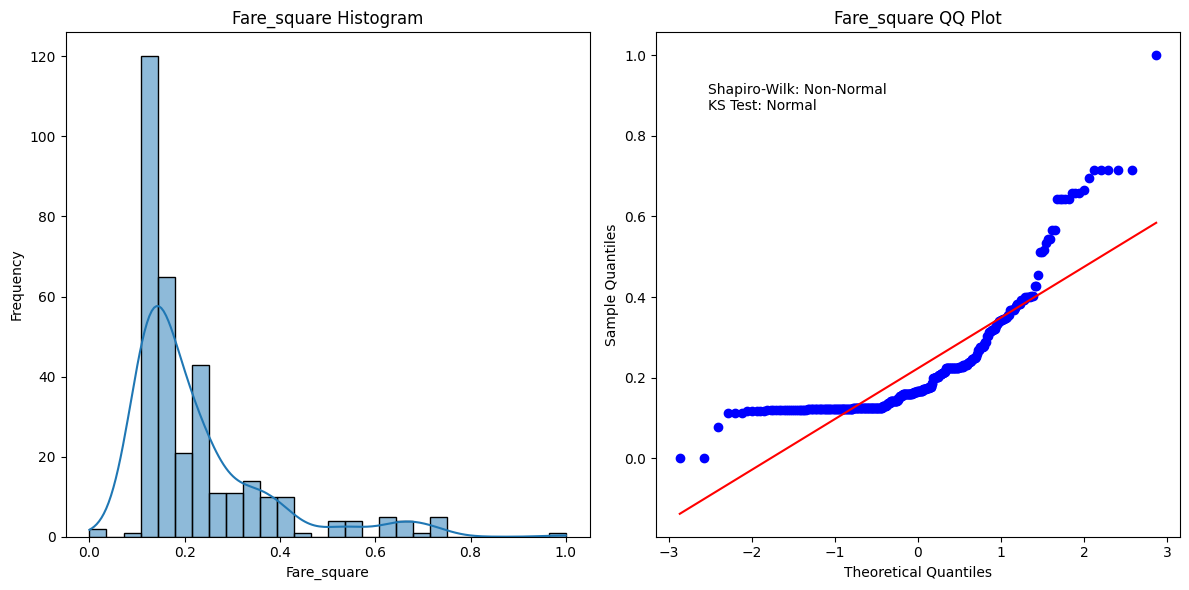

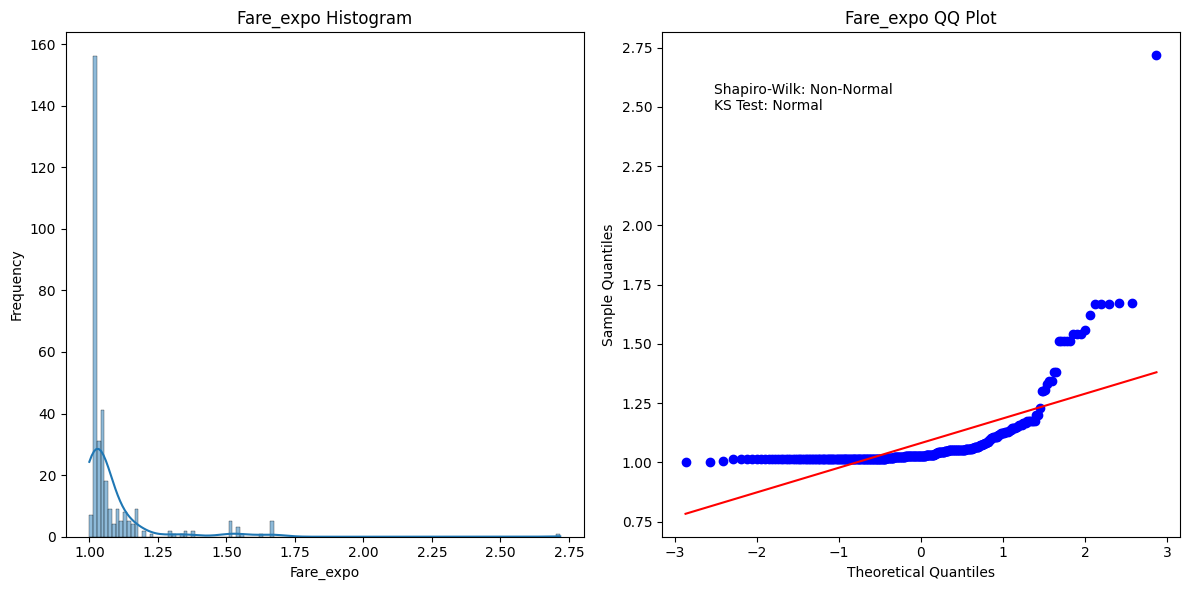

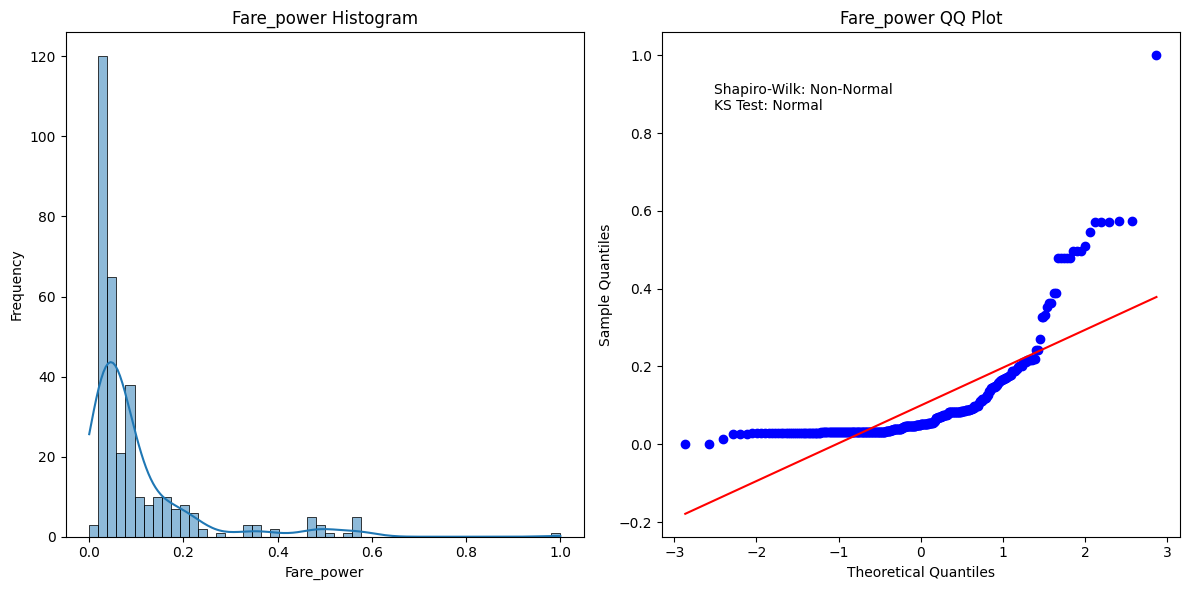

In [23]:
import numpy as np
#log_transform
X_train['Fare_log']=np.log(X_train['Fare']+0.001) # this look abit sucks
plot_data(X_train,'Fare_log')

#reciprocal transform
X_train['Fare_reciprocal']=1/(X_train['Fare']+0.001) # below all look sucks
plot_data(X_train,'Fare_reciprocal')

#square root transform
X_train['Fare_square']=X_train['Fare']**(1/2)
plot_data(X_train,'Fare_square')

#exponential transform
X_train['Fare_expo'] = np.exp(X_train['Fare'])
plot_data(X_train,'Fare_expo')

#power transform
X_train['Fare_power']=X_train['Fare']**(1/1.2)
plot_data(X_train,'Fare_power')


In [24]:
# For Age & Fare => Box-cox is selected 
X_train = X_train[['Pclass','Sex','SibSp','Parch','Cabin','Q','S','Miss_cabin','new_bc_Fare','new_bc_Age']]
X_train.head()

,Pclass,Sex,SibSp,Parch,Cabin,Q,S,Miss_cabin,new_bc_Fare,new_bc_Age
257,3,1.0,0,0,0,0.0,1.0,1,-0.769710,-0.171383
1,3,0.0,1,0,0,0.0,1.0,1,-0.894863,1.263416
341,3,1.0,0,0,0,0.0,1.0,1,-0.823719,0.146601
160,3,0.0,0,0,0,1.0,0.0,1,-0.805688,0.003301
172,3,1.0,1,0,0,0.0,1.0,1,-0.277307,-0.585077


{('Cabin', 'Miss_cabin'), ('Pclass', 'Miss_cabin')}


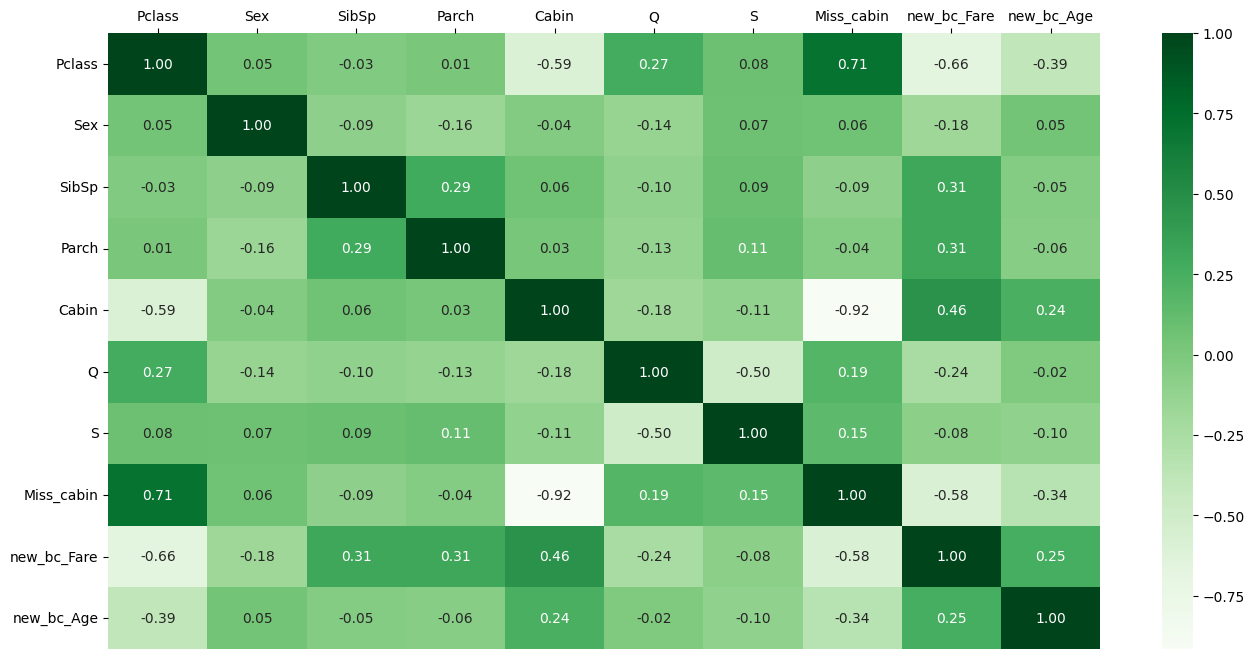

In [25]:
def check_corr(df,threshold):
    corr_mat = df.corr()
    redundant = np.where(np.abs(corr_mat)>=threshold)
    
    correlated_features=set()
    for i,j in zip(*redundant):
        if i!=j and i<j:
            #print(X.columns[i],X.columns[j])
            correlated_features.add((df.columns[i],df.columns[j]))

    return correlated_features

result = check_corr(X_train,0.7)
print(result)


plt.figure(figsize=(16, 8))
ax = sns.heatmap(X_train.corr(),annot=True,fmt='.2f',cmap='Greens',)
ax.xaxis.tick_top()
plt.show()

## Feature Importance
- Finding: Except for Sex, other features have low feature importance.
- need to be further investigated.
- from the obs: miss cabin seems likely can be removed, as it causing high collinearity with other features and lowest feature importance toward the y. (anyways, lets build base model first, then compare with removed style)

0 0.9412806131661963
1 0.012868328944551062
2 0.009888956144652777
3 0.008313098889459431
4 0.008146546628168688
5 0.007945743374024072
6 0.005180264386982386
7 0.002674522666550372
8 0.002215166289184192
9 0.001486759510230722


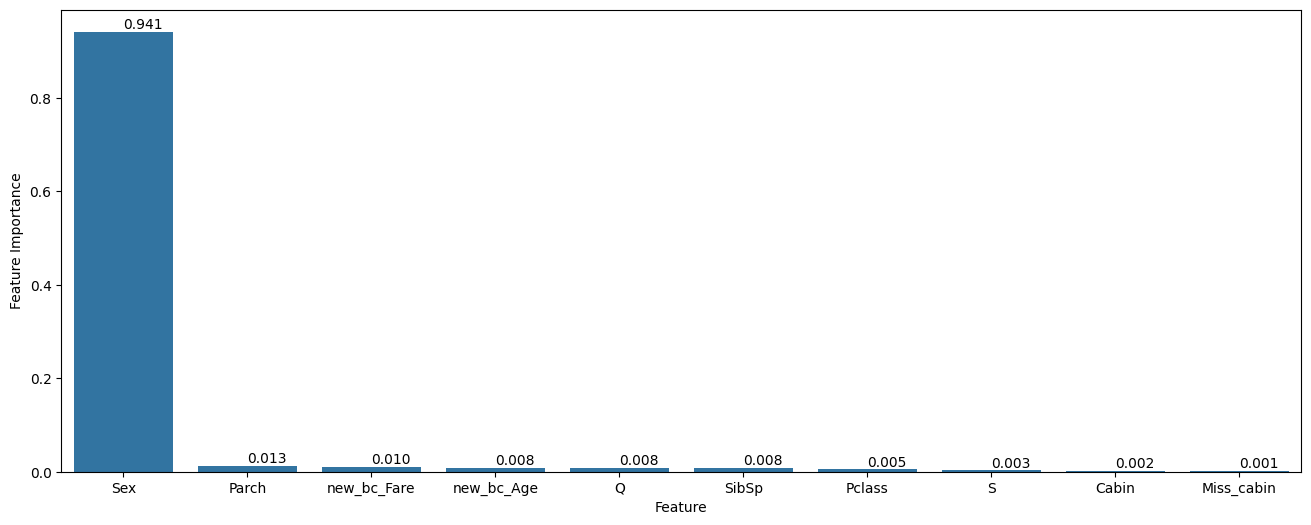

In [26]:
## Measure the feature importance between X and y
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier(random_state=43,n_jobs=-1).fit(X_train,y_train)

result = (fi.feature_importances_)
data = pd.DataFrame(result, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

# Display the DataFrame
plt.figure(figsize=(16,6))
sns.barplot(data['Feature Importance'])

for index,value in enumerate(data['Feature Importance']):
    print(index,value)
    plt.annotate(f'{value:.3f}',xy = (index,value),va='bottom')

plt.xlabel('Feature')
plt.show()

In [27]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Cabin,Q,S,Miss_cabin,new_bc_Fare,new_bc_Age
257,3,1.0,0,0,0,0.0,1.0,1,-0.769710,-0.171383
1,3,0.0,1,0,0,0.0,1.0,1,-0.894863,1.263416
341,3,1.0,0,0,0,0.0,1.0,1,-0.823719,0.146601
160,3,0.0,0,0,0,1.0,0.0,1,-0.805688,0.003301
172,3,1.0,1,0,0,0.0,1.0,1,-0.277307,-0.585077


In [28]:
def test_preprocess():
    X_test['Age'] = scaler_Age.transform(X_test[['Age']])
    X_test['Fare'] = scaler_Fare.transform(X_test[['Fare']])
    
    X_test['new_bc_Age'] = bc_age.transform(X_test[['Age']])
    X_test['new_bc_Fare'] = bc_fare.transform(X_test[['Fare']])

    data = X_test[['Pclass','Sex','SibSp','Parch','Cabin','Q','S','Miss_cabin','new_bc_Fare','new_bc_Age']]

    return data

X_test = test_preprocess()

X_test.head()

,Pclass,Sex,SibSp,Parch,Cabin,Q,S,Miss_cabin,new_bc_Fare,new_bc_Age
144,1,1.0,0,0,0,0.0,1.0,1,0.310449,0.901866
375,1,0.0,0,0,0,0.0,0.0,1,2.446219,1.119654
364,1,0.0,1,0,5,0.0,0.0,0,0.989512,-0.417826
290,1,1.0,0,0,0,0.0,1.0,1,0.678303,0.002699
88,3,0.0,0,0,0,1.0,0.0,1,-0.809698,0.002699


In [29]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
y_train.value_counts() # => Imbalanced Dataset, lets ignore for now (provide weight bias during model training)

(333, 10) (333,)
(84, 10) (84,)


Survived
0    212
1    121
Name: count, dtype: int64

## Train with base model first
- things to take note later: - class imbalanced, consider feature extraction
1. Naive Bayes (not suitable as the dataset consists of continuos and discrete features)
2. SVM
3. Random forest
4. Logistic Regression
5. Neural Network

In [30]:
# Naive Bayes
from Basedmodel import Model

model = Model(data_train=(X_train,y_train),data_test=(X_test,y_test))

(333, 10)
(333,)
(84, 10)
(84,)


In [31]:
# SVM
svm = model.Model('svm')

Accuracy_Score  = 0.9880952380952381 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.97      0.98        31

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84
 
 [[53  0]
 [ 1 30]]


In [32]:
# Random Forest
rf = model.Model('rf')

Accuracy_Score  = 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 
 [[53  0]
 [ 0 31]]


In [33]:
# Logistic Regression
lr = model.Model('lr')

Accuracy_Score  = 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 
 [[53  0]
 [ 0 31]]


c:\Users\User\Desktop\Algorithms\DataScience\well_structured\titanic_dataset_p\Titanic\lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


In [34]:
nn = model.Model('nn')

(249,) (84,)


c:\Users\User\Desktop\Algorithms\DataScience\well_structured\titanic_dataset_p\Titanic\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,836 (34.52 KB)

 Trainable params: 8,836 (34.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6560 - loss: 1.0422 - val_accuracy: 0.6310 - val_loss: 0.7248
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6299 - loss: 0.6962 - val_accuracy: 0.6429 - val_loss: 0.6175
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 0.5948 - val_accuracy: 0.6667 - val_loss: 0.5674
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7130 - loss: 0.5444 - val_accuracy: 0.7143 - val_loss: 0.5041
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7455 - loss: 0.4558 - val_accuracy: 0.8095 - val_loss: 0.3804
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.3578 - val_accuracy: 0.9405 - val_loss: 0.2538
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.2144 - val_accuracy: 1.0000 - val_loss: 0.1333
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9941 - loss: 0.1251 - val_accuracy: 1.0000 - val_loss

c:\Users\User\Desktop\Algorithms\DataScience\well_structured\titanic_dataset_p\Basedmodel.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=keys,y=values,palette="rocket")


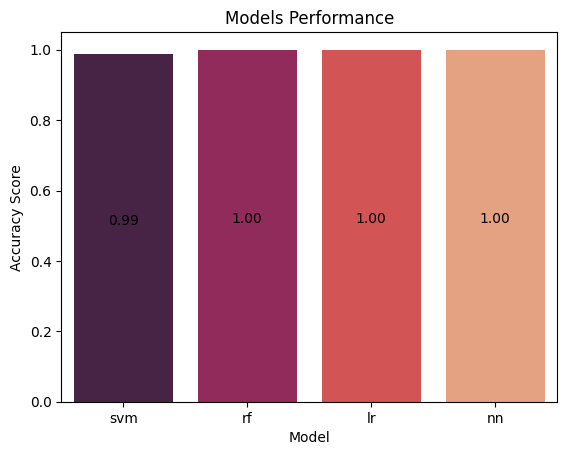

In [35]:
model.plot()

### note
1. theres high chance that those models are overfitting.
2. issues 
    - class imbalanced
    - dataset is small
    - 'missing cabin' column (high collinearity)